In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Fetching the data

dataset = pd.read_csv('loan_prediction.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#exploring and understanding the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#checking how the credit history affects the credit application of an applicant

pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


[Text(0.5, 0, 'Applicant Income')]

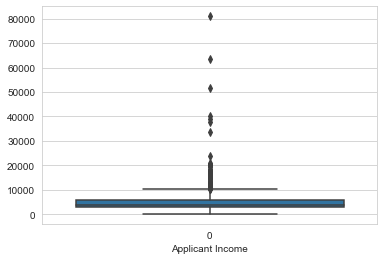

In [8]:
sns.set_style("whitegrid")
sns.boxplot(data=dataset['ApplicantIncome']).set(xlabel='Applicant Income')

<AxesSubplot:>

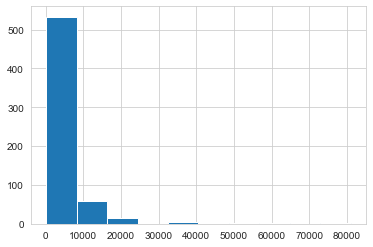

In [10]:
dataset["ApplicantIncome"].hist()

We can see that above hisstogram is right skewed and we will have to normalise these values. 

<AxesSubplot:>

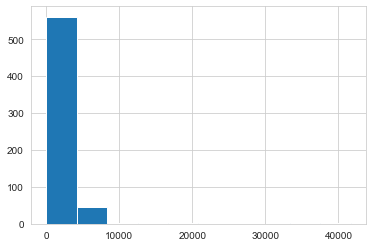

In [11]:
dataset["CoapplicantIncome"].hist()

Coapplicant income is also right skewed.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

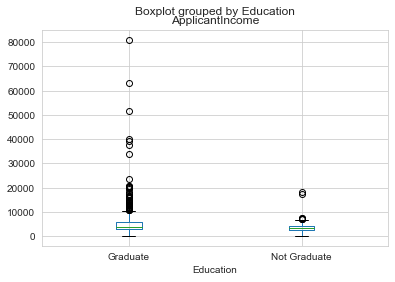

In [12]:
dataset.boxplot(column='ApplicantIncome', by='Education')

We see Graduates having very high salaries compared to non-graduates but this is quite common. 

<AxesSubplot:>

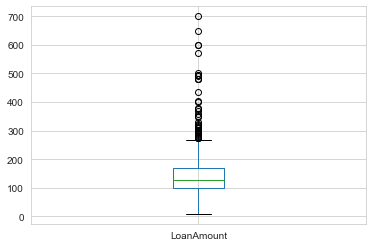

In [13]:
dataset.boxplot(column='LoanAmount')

array([[<AxesSubplot:title={'center':'LoanAmount'}>]], dtype=object)

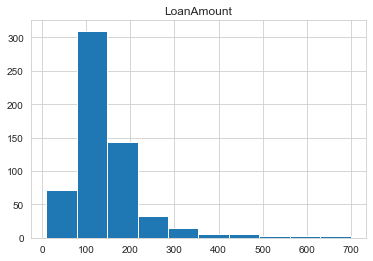

In [14]:
dataset.hist(column='LoanAmount')

We can see most of of the columns have outliers so we will have to handle the same. Also, the these graphs are right skewed so we will have to normalise them now. 

We will normalise the values with Numpy log function and check with a histogram if the values have been normalised. 

<AxesSubplot:>

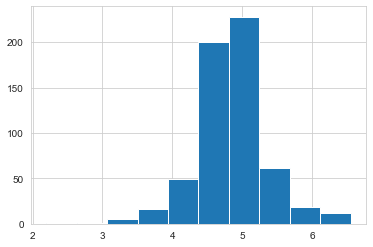

In [16]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist()

In [21]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

As we can see, we have null values in this dataset. We will now fill the missing values column by column. We will use mode function on classification columns and mean/median on continuous values columns.

In [24]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [25]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(),inplace=True)
dataset['LoanAmount_log'].fillna(dataset['LoanAmount_log'].mean(),inplace=True)

In [26]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

<AxesSubplot:>

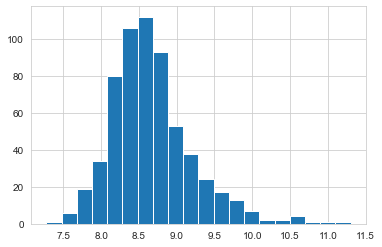

In [29]:
dataset['TotalIncome']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['TotalIncome_log']=np.log(dataset['TotalIncome'])
dataset['TotalIncome_log'].hist(bins=20)

Now that we have handled all the missing values and skewness, let us divide the data of independent and dependent valiables and store them separately. 

In [48]:
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [33]:
X= dataset.iloc[:, np.r_[1:5,9:11,13:15]].values #independent variables array
y= dataset.iloc[:,12].values #dependent variables array

In [34]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [35]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [38]:
X_train

array([['Male', 'Yes', '0', ..., 1.0, 4.875197323201151, 5858.0],
       ['Male', 'No', '1', ..., 1.0, 5.278114659230517, 11250.0],
       ['Male', 'Yes', '0', ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       ['Male', 'Yes', '3+', ..., 1.0, 5.298317366548036, 8334.0],
       ['Male', 'Yes', '0', ..., 1.0, 5.075173815233827, 6033.0],
       ['Female', 'Yes', '0', ..., 1.0, 5.204006687076795, 6486.0]],
      dtype=object)

There are categorical values in X_train set and we shall convert them into 0s and 1s. We will be using Label Encoder to convert categorical text into numeric format.

In [39]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [49]:
for i in range(0,5):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

In [50]:
X_train[:,7] = labelencoder_X.fit_transform(X_train[:,7])

In [51]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [52]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [53]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [54]:
for i in range(0,5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])

In [55]:
X_test[:,7] = labelencoder_X.fit_transform(X_test[:,7])

In [58]:
labelencoder_y = LabelEncoder()
Y_test = labelencoder_y.fit_transform(Y_test)

Now, we will scale our dataset since we have multiple variables with different range. WIth scaling, our prediction and analysis becomes much easier.

In [59]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

Now that we are done with all the preprocessing, handling missing values, outliers and scaling; let us start with applying algorithms.

First we will apply Decision Tree Classifier. 

In [62]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [63]:
y_pred=DTClassifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

After fitting the data in the Decision Tree model and getting the predicted data back, let us test the accuracy by comparing the rpedicted data with test data. 

In [65]:
from sklearn import metrics
metrics.accuracy_score(y_pred,Y_test)

0.7073170731707317

Decision Tree model has shown 70% accuracy. This means our model was able to predict 70 of the values right. 

Let us now build another model with Naive Bayes. 

In [66]:
from sklearn.naive_bayes import GaussianNB
NBClassifier= GaussianNB()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [70]:
y_pred=NBClassifier.predict(X_test)

In [71]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [72]:
metrics.accuracy_score(y_pred,Y_test)

0.8292682926829268

We can see that Naive Bayes model shows 82% accuracy which is better than Decision Tree.

 Since we have now tested our models on the training data, let us now apply Naive Bayes model on our test data. 

In [77]:
testdata=pd.read_csv('loan_prediction_testdata.csv')

In [78]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002562,Male,Yes,1,Not Graduate,No,5333,1131,186.0,360,NaN,Urban
1,LP002571,Male,No,0,Not Graduate,No,3691,0,110.0,360,1.0,Rural
2,LP002582,Female,No,0,Not Graduate,Yes,17263,0,225.0,360,1.0,Semiurban
3,LP002585,Male,Yes,0,Graduate,No,3597,2157,119.0,360,0.0,Rural
4,LP002586,Female,Yes,1,Graduate,No,3326,913,105.0,84,1.0,Semiurban


In [79]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Gender             119 non-null    object 
 2   Married            123 non-null    object 
 3   Dependents         120 non-null    object 
 4   Education          123 non-null    object 
 5   Self_Employed      118 non-null    object 
 6   ApplicantIncome    123 non-null    int64  
 7   CoapplicantIncome  123 non-null    int64  
 8   LoanAmount         119 non-null    float64
 9   Loan_Amount_Term   123 non-null    int64  
 10  Credit_History     112 non-null    float64
 11  Property_Area      123 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 11.7+ KB


Let us handle the missing values, outliers like we did with the training data. 

In [81]:
testdata.isnull().sum()

Loan_ID               0
Gender                4
Married               0
Dependents            3
Education             0
Self_Employed         5
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            4
Loan_Amount_Term      0
Credit_History       11
Property_Area         0
dtype: int64

In [82]:
testdata["Gender"].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata["Dependents"].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata["Self_Employed"].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata["Loan_Amount_Term"].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)
testdata["Credit_History"].fillna(testdata['Credit_History'].mode()[0],inplace=True)

In [83]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           4
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

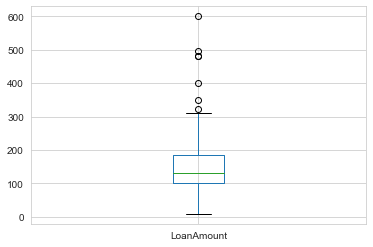

In [84]:
testdata.boxplot(column='LoanAmount')

<AxesSubplot:>

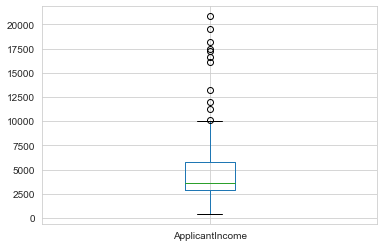

In [85]:
testdata.boxplot(column='ApplicantIncome')

In [86]:
testdata.LoanAmount=testdata.LoanAmount.fillna(testdata['LoanAmount'].mean())

In [87]:
testdata['LoanAmount_log']=np.log(testdata['LoanAmount'])

In [88]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [89]:
testdata['TotalIncome']=testdata['ApplicantIncome']+testdata['CoapplicantIncome']

In [90]:
testdata['TotalIncome_log']=np.log(testdata['TotalIncome'])

In [91]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP002562,Male,Yes,1,Not Graduate,No,5333,1131,186.0,360,1.0,Urban,5.225747,6464,8.774004
1,LP002571,Male,No,0,Not Graduate,No,3691,0,110.0,360,1.0,Rural,4.700480,3691,8.213653
2,LP002582,Female,No,0,Not Graduate,Yes,17263,0,225.0,360,1.0,Semiurban,5.416100,17263,9.756321
3,LP002585,Male,Yes,0,Graduate,No,3597,2157,119.0,360,0.0,Rural,4.779123,5754,8.657651
4,LP002586,Female,Yes,1,Graduate,No,3326,913,105.0,84,1.0,Semiurban,4.653960,4239,8.352083


In [92]:
test = testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [93]:
for i in range(0,5):
    test[:,i]=labelencoder_X.fit_transform(test[:,i])

In [94]:
test[:,7]=labelencoder_X.fit_transform(test[:,7])

In [97]:
test

array([[1, 1, 1, 1, 6, 1.0, 6464, 70],
       [1, 0, 0, 1, 6, 1.0, 3691, 22],
       [0, 0, 0, 1, 6, 1.0, 17263, 113],
       [1, 1, 0, 0, 6, 0.0, 5754, 59],
       [0, 1, 1, 0, 2, 1.0, 4239, 31],
       [1, 1, 0, 1, 6, 1.0, 4300, 34],
       [1, 1, 0, 0, 0, 1.0, 7482, 89],
       [1, 1, 1, 0, 6, 1.0, 2895, 6],
       [1, 0, 0, 0, 6, 0.0, 10699, 106],
       [0, 0, 0, 0, 7, 1.0, 4328, 36],
       [0, 0, 0, 0, 6, 1.0, 3159, 9],
       [1, 1, 2, 0, 6, 1.0, 10489, 105],
       [1, 1, 1, 1, 6, 1.0, 9352, 99],
       [1, 1, 0, 1, 5, 1.0, 5297, 53],
       [1, 1, 2, 0, 6, 1.0, 7926, 93],
       [1, 1, 0, 0, 6, 1.0, 27500, 117],
       [1, 0, 0, 0, 6, 1.0, 3583, 15],
       [1, 1, 0, 0, 6, 1.0, 5492, 56],
       [0, 0, 1, 0, 6, 1.0, 13262, 109],
       [1, 0, 0, 1, 6, 1.0, 4885, 48],
       [1, 1, 1, 0, 6, 1.0, 8069, 95],
       [1, 1, 2, 0, 6, 1.0, 5318, 54],
       [1, 1, 0, 0, 3, 1.0, 8796, 97],
       [1, 0, 0, 0, 6, 1.0, 9481, 101],
       [1, 1, 3, 0, 6, 1.0, 6894, 83],
       [0, 1, 2,

In [98]:
test=ss.fit_transform(test)

In [100]:
pred = NBClassifier.predict(test)

In [101]:
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

This is the final prediction of Naive Bayes model where 1 represents that the customer is eligible for loan and 0 represents that customer is not eligible for loan. 

# Serialization

In [ ]:
import pickle

#dumping the file with pickling
filename = 'Loan prediction'
pickle.dump(NBClassifier, open(filename, 'wb'))

#loading the model
pickled_model = pickle.load(open(filename, 'rb'))
pickled_model.predict(X_test)